# SVM 支持向量机: 解决非线性问题
- SVM能带来的效果
- 软间隔的作用，这复杂的算法会导致过拟合现象，如何解决？
- 核函数的作用，线性分类根本轮不到SVM登场,核函数是他的强大之处/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import warnings

In [2]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
warnings.filterwarnings('ignore')

# 支持向量机能带来的效果

In [3]:
# 导入svm模块下的SVC的分类器
from sklearn.svm import SVC
# 采用标准化数据集：在datasets中
from sklearn import datasets

# load 数据集
iris = datasets.load_iris()
# 选择所有数据的两个特征
X = iris['data'][:,(2,3)]
# 标签
y = iris['target']

# 只选择两种花:索引
setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# 构造svc的分类器: kernel='linear': 构造线性分类器；C=float('inf'): 控制过拟合，先不考虑
svm_clf = SVC(kernel='linear',C=float('inf'))
# 训练模型
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
help(svm_clf)

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  oth

# 决策边界可视化展示

[0, 5.5, 0, 2]

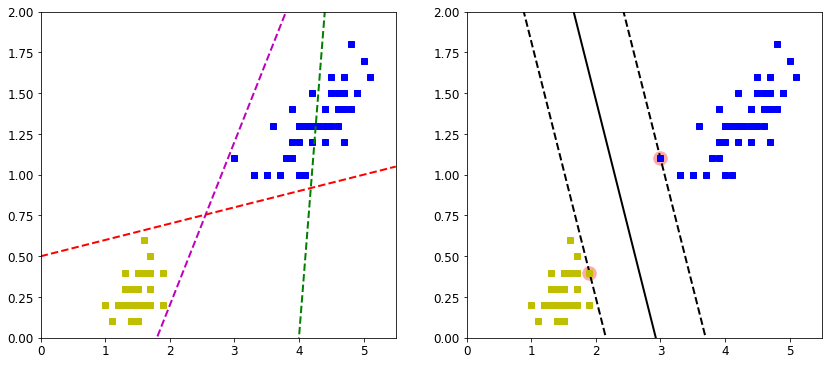

In [4]:
# 一般的模型
x0 = np.linspace(0,5.5,200)

# 定义三条线
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf,xmin,xmax,sv=True):
    # 需要两个点，w和b,
    # 得到权重参数和偏置参数
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # 从传进来的参数中从最小值到最大值选出200个点
    x0 = np.linspace(xmin,xmax,200)
    
    # 算决策边界，即x1
    decision_boundary = -w[0]/w[1]*x0 - b/w[1]
    # 边界上的点到决策边界的距离
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    # 画支持向量
    if sv:
        # support_vectors_: 调用支持向量
        svs = svm_clf.support_vectors_
        # 支持向量是二维的点
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolor='#FFAAAA')
    plt.plot(x0,decision_boundary,'k-',linewidth = 2)
    plt.plot(x0,gutter_up,'k--',linewidth = 2)
    plt.plot(x0,gutter_down,'k--',linewidth = 2)
    
plt.figure(figsize=(14,6))


plt.subplot(121)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.plot(x0,pred_1,'g--',linewidth=2)
plt.plot(x0,pred_2,'m--',linewidth=2)
plt.plot(x0,pred_3,'r--',linewidth=2)
# 指定x轴的取值范围
plt.axis([0,5.5,0,2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf,0,5.5)
# 不同的类别
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.axis([0,5.5,0,2])

# 软间隔的作用： 防止过拟合
# 数据标准化： 一定要做
# 使用超参数控制软间隔程度

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [6]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

# 对比不同的C值效果的差异：C值越大，过拟合的风险越高，一般选择c值较小的，对于分类问题的参数设置，可以利用交叉验证
- 在有侧，使用较高的C值，分类器会减少误分类，但最终会有较小的间隔。
- 在左侧，使用较低的C值，间隔要大得多，但很多实例最终会出现在间隔之内。

In [7]:
# https://scikit-learn.org/dev/modules/compose.html
# 用流水线训练一个基本的svc模型
svm_clf = Pipeline([
    ('std',StandardScaler()),   # 数据标准化
    ('linear_svc',LinearSVC(C=1))    # 设置初始化的C值，建立线性模型
])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [8]:
#用训练好的分类器进行预测,是0还是1
svm_clf.predict([[5.5,3.2]])

array([1.])

In [12]:
scaler = StandardScaler()

svm_clf1 = LinearSVC(C=1,random_state=42)
svm_clf2 = LinearSVC(C=100,random_state=42)

scaled_svm_clf1 = Pipeline((('std',StandardScaler()),('linear_svc',svm_clf1)))    # 数据标准化    # 设置初始化的C值，建立线性模型


scaled_svm_clf2 = Pipeline((('std',StandardScaler()),('linear_svc',svm_clf2)))   # 数据标准化   # 设置初始化的C值，建立线性模型

scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [15]:
# 做了标准化的操作，此时先将参数还原
b1 = svm_clf1.decision_function([-scaler.mean_ /scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ /scaler.scale_])
w1 = svm_clf1.coef_[0]/scaler.scale_
w2 = svm_clf2.coef_[0]/scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

AttributeError: 'StandardScaler' object has no attribute 'mean_'

[4, 6, 0.8, 2.8]

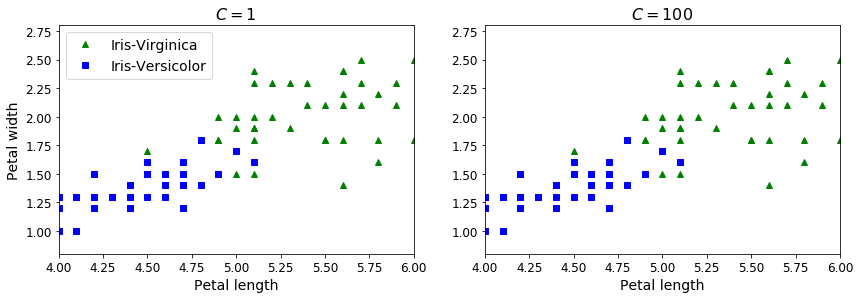

In [20]:
plt.figure(figsize=(14,4.2))
plt.subplot(121)
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^",label='Iris-Virginica')
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs",label='Iris-Versicolor')
plot_svc_decision_boundary(svm_clf1,4,6,sv=False)
plt.xlabel('Petal length',fontsize = 14)
plt.ylabel('Petal width',fontsize = 14)
plt.legend(loc='upper left',fontsize = 14)
plt.title("$C = {}$".format(svm_clf1.C),fontsize=16)
plt.axis([4,6,0.8,2.8])


plt.subplot(122)
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plot_svc_decision_boundary(svm_clf2,4,6,sv=False)
plt.xlabel('Petal length',fontsize = 14)
plt.title("$C = {}$".format(svm_clf2.C),fontsize=16)
plt.axis([4,6,0.8,2.8])

# 非线性支持向量机

[-4.5, 4.5, -1, 17]

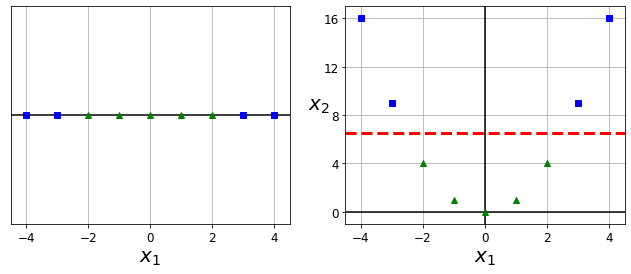

In [24]:
# 构造数据
X1D = np.linspace(-4,4,9).reshape(-1,1)
X2D = np.c_[X1D,X1D**2]
y = np.array([0,0,1,1,1,1,1,0,0])

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.grid(True,which='both')
plt.axhline(y=0,color='k')

plt.plot(X1D[:,0][y==0],np.zeros(4),'bs')
plt.plot(X1D[:,0][y==1],np.zeros(5),'g^')

plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r'$x_1$',fontsize=20)

plt.axis([-4.5,4.5,-0.2,0.2])

plt.subplot(122)
plt.grid(True,which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.plot(X2D[:,0][y==0],X2D[:,1][y==0],'bs')
plt.plot(X2D[:,0][y==1],X2D[:,1][y==1],'g^')

plt.xlabel(r'$x_1$',fontsize=20)
plt.ylabel(r'$x_2$',fontsize=20,rotation=0)
plt.gca().get_yaxis().set_ticks([0,4,8,12,16])
plt.plot([-4.5,4.5],[6.5,6.5],'r--',linewidth=3)
plt.axis([-4.5,4.5,-1,17])

# 创建一个有难度的数据，只是对数据做非线性的变换，能不能达到较好的结果

In [25]:
from sklearn.datasets import make_moons


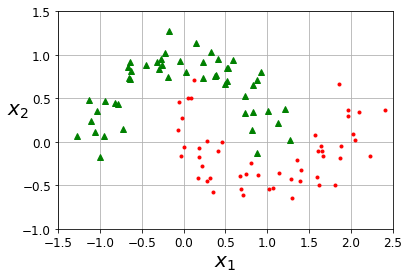

In [31]:
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

def plot_dataset(X,y,axes):
    # 画负例的数据
    plt.plot(X[:,0][y==0],X[:,1][y==0],'g^')
    # 画正例数据
    plt.plot(X[:,0][y==1],X[:,1][y==1],'r.')
    plt.axis(axes)
    
    plt.grid(True,which='both')
    plt.xlabel(r'$x_1$',fontsize=20)
    plt.ylabel(r"$x_2$",fontsize=20,rotation=0)
    
# 调用函数    
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()    

In [33]:

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
# 导入预处理模块下的PolynomialFeatures： 提高数据的维度
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ('Poly_features',PolynomialFeatures(degree=3)),  # 升高为三维的
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('Poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

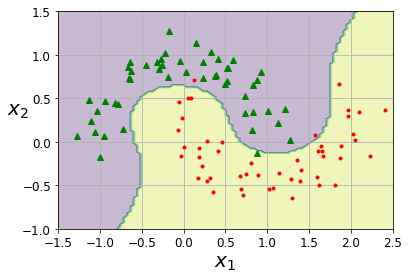

In [50]:
# 进行绘制
def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    # 绘制棋盘
    x0,x1 = np.meshgrid(x0s,x1s)
    # 要进行拼接操作,还得进行拉长操作！！！！！！   指定名字待测试数据
    X = np.c_[x0.ravel(),x1.ravel()]
    # 进行实际的预测,进行reshape操作，棋盘是几维的传进来的数据也要是几维的
    y_pred = clf.predict(X).reshape(x0.shape)
    # 绘制等高线，对等高线进行填充,指定一下颜色，colormap,指定透明度
    plt.contourf(x0,x1,y_pred,cmp = plt.cm.brg,alpha = 0.3)

    # 之前已经训练好一个分类器了，可以传进来
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
# 画一下决策边界
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

# 支持向量机最核心的部分：核函数
# SVM的核技巧

In [51]:
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import StandardScaler


In [52]:
# 核函数就是一个kernel的选择问题，default = 'rbf',径向基核函数：，高斯核函数参数值的选择，linear,ploy,rbf(最为重要，经常用)

poly_kernel_svm_clf=Pipeline([('scaler',StandardScaler()),
                              ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))   # coef0：偏置项，影响不大，degree：影响较大，平方项
                             ])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [76]:
ploy100_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),
                                   ('svm_clf',SVC(kernel='poly',degree=10,coef0=100,C=5))
                                  ])
ploy100_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0.5, 1.0, '$d=10,r=100,C=5$')

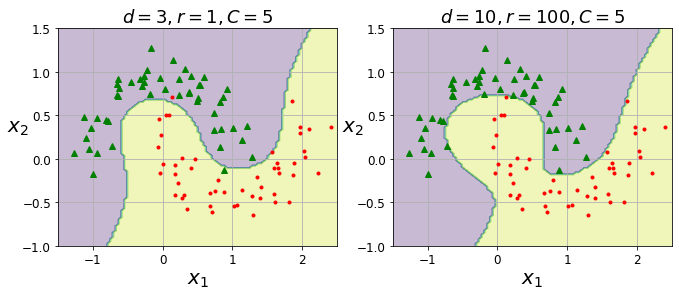

In [77]:
# 对比一下分类器，画图操作
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title('$d=3,r=1,C=5$',fontsize=18)

plt.subplot(122)
plot_predictions(ploy100_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title('$d=10,r=100,C=5$',fontsize=18)

# 研究gamma值的影响：gamma值越大过拟合的风险越大，辐射的范围更小了，只是针对个别的点起作用
gamma值越小，过拟合的风险越小，辐射的范围更大，
# 理论情况下，可以对每一个实例（样本数据点）创建一个地标，此时会将mn的训练集转换为mm的训练集  m: 样本个数，n: 特征个数    看的是相似度特征，mm个

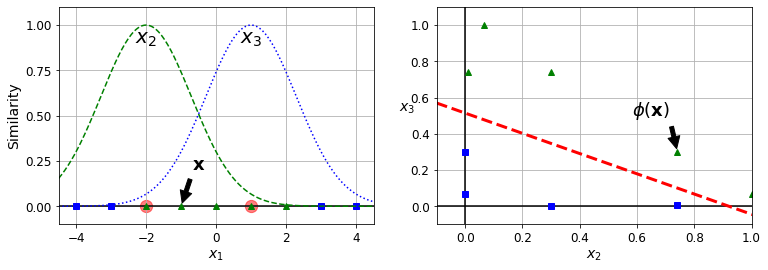

In [92]:
def gaussian_rbf(x,landmark,gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark,axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5,4.5,200).reshape(-1,1)
x2s = gaussian_rbf(x1s,-2,gamma)
x3s = gaussian_rbf(x1s,1,gamma)

XK = np.c_[gaussian_rbf(X1D,-2,gamma),gaussian_rbf(X1D,1,gamma)]
yk = np.array([0,0,1,1,1,1,1,0,0])

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.grid(True,which='both')
plt.axhline(y=0,color='k')
plt.scatter(x=[-2,1],y=[0,0],s=150,alpha=0.5,c='red')
plt.plot(X1D[:,0][yk==0],np.zeros(4),'bs')
plt.plot(X1D[:,0][yk==1],np.zeros(5),'g^')

plt.plot(x1s,x2s,'g--')
plt.plot(x1s,x3s,'b:')

plt.gca().get_yaxis().set_ticks([0,0.25,0.5,0.75,1])
plt.xlabel(r'$x_1$',fontsize=14)
plt.ylabel(r'Similarity',fontsize=14)
plt.annotate(r'$\mathbf{x}$',xy=(X1D[3,0],0),
            xytext=(-0.5,0.20),
            ha='center',
            arrowprops=dict(facecolor='black',shrink=0.1),
            fontsize=18)
plt.text(-2,0.9,'$x_2$',ha='center',fontsize=20)
plt.text(1,0.9,'$x_3$',ha='center',fontsize=20)
plt.axis([-4.5,4.5,-0.1,1.1])



plt.subplot(122)
plt.grid(True,which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.plot(XK[:,0][yk==0],XK[:,1][yk==0],'bs')
plt.plot(XK[:,0][yk==1],XK[:,1][yk==1],'g^')
plt.xlabel(r'$x_2$',fontsize=14)
plt.ylabel(r'$x_3$',fontsize=14,rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3,0],XK[3,1]),
             xytext=(0.65,0.50),
             ha='center',
             arrowprops=dict(facecolor='black',shrink=0.1),
             fontsize=18)
plt.plot([-0.1,1.1],[0.57,-0.1],'r--',linewidth=3)
plt.axis([-0.1,1.0,-0.1,1.1])

plt.subplots_adjust(right = 1)

plt.show()


# SVM利用了核函数的计算技巧，大大降低了计算的复杂度
- 增加gamma Y使高斯曲线变窄，实例范围更小，决策边界最终变得更不规则，在个别实例周围摆动
- 减少gamma y 值,使得高斯曲线变宽，因此实例有更大的影响范围，并且决策边界平滑了

In [93]:
rbf_kernel_sm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001))
])

rbf_kernel_sm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [91]:
from sklearn.svm import SVC

# 对比gamma值的不同影响

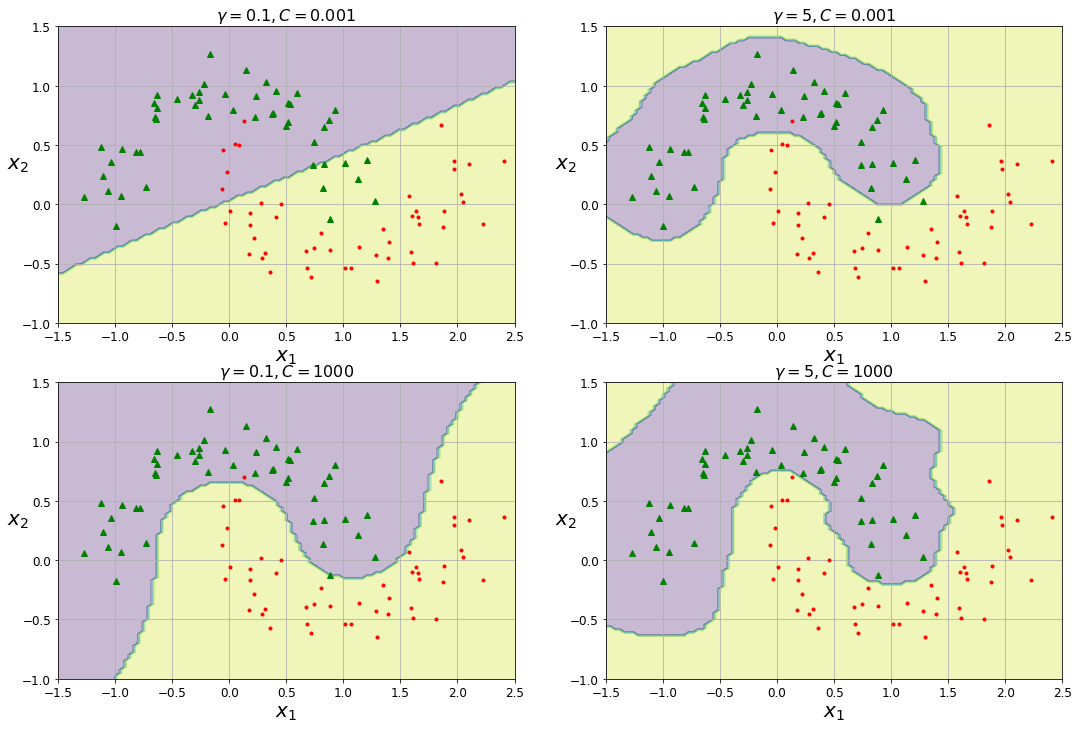

In [101]:
from sklearn.svm import SVC

gamma1,gamma2 = 0.1,5
C1,C2 = 0.001,1000 
# 交叉验证 4组
hyperparams =(gamma1,C1),(gamma2,C1),(gamma1,C2),(gamma2,C2)

svm_clfs = []
for gamma,C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ('scaler',StandardScaler()),
        ('svm_clf',SVC(kernel='rbf',gamma=gamma,C=C))
    ])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
plt.figure(figsize=(18,12))

for i,svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf,[-1.5,2.5,-1,1.5])
    plot_dataset(X,y,[-1.5,2.5,-1,1.5])
    gamma,C = hyperparams[i]
    plt.title(r'$\gamma = {},C = {}$'.format(gamma,C),fontsize=16)
plt.show()